In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,accuracy_score

In [2]:
data = pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
data.head(4)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313


In [4]:
data.drop(['Customer Name','Customer e-mail','Country'],axis=1,inplace=True)
data.head(4)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313


In [5]:
X = data.drop('Car Purchase Amount',axis=1)
y = data['Car Purchase Amount']

In [6]:
print(X.shape)
print(y.shape)

(500, 5)
(500,)


In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

In [8]:
scaler.data_max_

array([80000.])

In [9]:
scaler.data_min_

array([9000.])

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=.25)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375, 1)
(125, 1)


In [12]:
model = Sequential()
model.add(Dense(25,input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
epochs_hist = model.fit(x_train,y_train,epochs=30,batch_size=50,verbose=1,validation_split=.2)


Epoch 1/30
6/6 [==============================] - 2s 76ms/step - loss: 0.1134 - val_loss: 0.0813
Epoch 2/30
6/6 [==============================] - 0s 17ms/step - loss: 0.0643 - val_loss: 0.0458
Epoch 3/30
6/6 [==============================] - 0s 15ms/step - loss: 0.0410 - val_loss: 0.0347
Epoch 4/30
6/6 [==============================] - 0s 19ms/step - loss: 0.0342 - val_loss: 0.0307
Epoch 5/30
6/6 [==============================] - 0s 22ms/step - loss: 0.0299 - val_loss: 0.0256
Epoch 6/30
6/6 [==============================] - 0s 18ms/step - loss: 0.0246 - val_loss: 0.0211
Epoch 7/30
6/6 [==============================] - 0s 17ms/step - loss: 0.0202 - val_loss: 0.0189
Epoch 8/30
6/6 [==============================] - 0s 18ms/step - loss: 0.0175 - val_loss: 0.0171
Epoch 9/30
6/6 [==============================] - 0s 21ms/step - loss: 0.0157 - val_loss: 0.0150
Epoch 10/30
6/6 [==============================] - 0s 18ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 11/30
6/6 [============

In [16]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

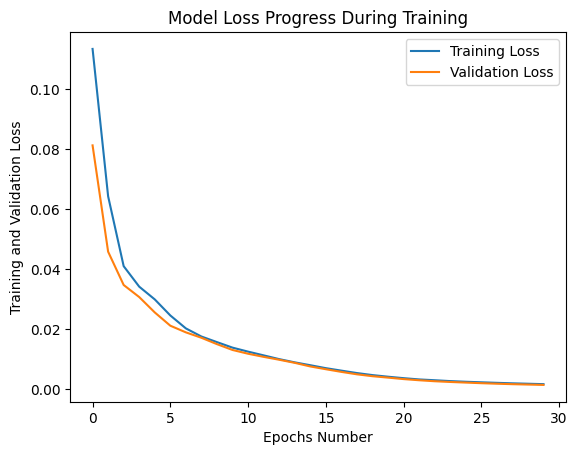

In [17]:
plt.title("Model Loss Progress During Training")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epochs Number")
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])

In [18]:
x_res =model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [19]:
mse = mean_squared_error(x_res, y_test)
print(f'Mean Square Error is {mse*100:.2f}%')

Mean Square Error is 0.18%


In [20]:
model_acc = 100-mse*100
print(f"{model_acc:.2f}%")

99.82%
